# Compare Solvation Energies
Compare those computed with NWChem or XTB to Gaussian.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

## Load in Datasets
We'll get just the ones for the fully-relaxed geometries

In [2]:
gaussian_data = pd.read_csv('datasets/gaussian-redox.csv')

In [3]:
xtb_data = pd.read_csv('datasets/xtb_redox.csv')

In [4]:
smb_data = pd.read_csv('datasets/small-basis_no-zpe_redox.csv')

## Compare the Methods
Plot the Gaussian vs NWChem or XTB

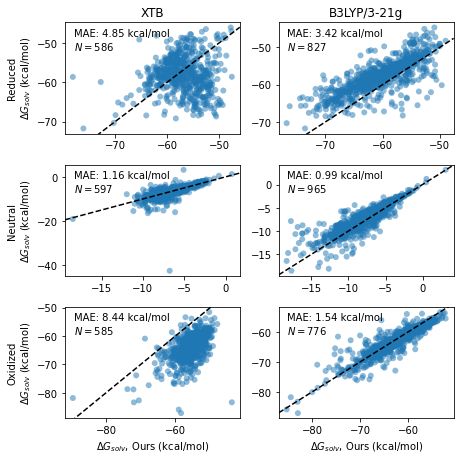

In [5]:
fig, axxs = plt.subplots(3, 2, figsize=(6.5, 6.5))


for label, axs in zip(['reduced', 'neutral', 'oxidized'], axxs):
    for data, title, col, ax in zip([xtb_data, smb_data], ['XTB', 'B3LYP/3-21g'], ['acetonitrile', 'acetntrl'], axs):
        if label == 'reduced':
            ax.set_title(title)
        if label == 'oxidized':
            ax.set_xlabel('$\Delta G_{solv}$, Ours (kcal/mol)')

        nwc_col = f'solvent_{col}_{label}'
        merged_data = data[['inchi_key', nwc_col]].merge(gaussian_data[['inchi_key', f'solvent_{label}.B3LYP_acetonitrile']], on='inchi_key', how='inner')
        merged_data.iloc[:, 1] *= 627.50947406  # Convert Ha to kcal/mol
        merged_data = merged_data[~merged_data.iloc[:, 1:].isnull().any(axis=1)]

        ax.scatter(merged_data.iloc[:, 1], merged_data.iloc[:, 2], alpha=0.5, edgecolor='none')

        mae = (merged_data.iloc[:, 1] - merged_data.iloc[:, 2]).abs().mean()
        ax.text(0.05, 0.95, f'MAE: {mae:.2f} kcal/mol\n$N = {len(merged_data)}$',
                va='top', transform=ax.transAxes)

        
    axs[0].set_ylabel(f'{label.capitalize()}\n$\Delta G_{{solv}}$ (kcal/mol)')

    # Fix the axes
    for ax in axs:
        ax.set_xlim(ax.get_xlim())
        ax.set_ylim(ax.get_ylim())
        ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')

fig.tight_layout()